# Data Analysis
## Class 18
### Average, Centering, Variance
#### November 13th

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import direct from seaborn without having the dataset in the same folder

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [4]:
df = df.dropna()
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Matrix form of statistical quantities

In [6]:
y = df.iloc[:,0].values.reshape(-1, 1)
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [11

In [7]:
n = y.shape[0]

In [8]:
v1s  = np.ones(n)
v1s

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [9]:
v1s.transpose().dot(v1s).reshape(-1, 1)

array([[392.]])

Construct $(1_{p}^T 1_{p})^{-1}$

In [61]:
inv = np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1, 1))

In [11]:
v1s.transpose().dot(y)

array([9190.8])

In [12]:
np.dot(v1s.T, y)

array([9190.8])

In [13]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1, 1)).dot(v1s.transpose().dot(y))

array([23.44591837])

In [14]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1, 1)) * v1s.transpose().dot(y)

array([[23.44591837]])

In [64]:
def mymean(matrix):
    '''Write a function that find the average using matrix representations'''
    p = matrix.shape[0]
    v1 = np.ones(p)
    return np.linalg.inv(v1.T.dot(v1).reshape(-1, 1)) * v1.T.dot(matrix)

In [65]:
mymean(y)

array([[23.44591837]])

In [16]:
y.mean()

23.445918367346938

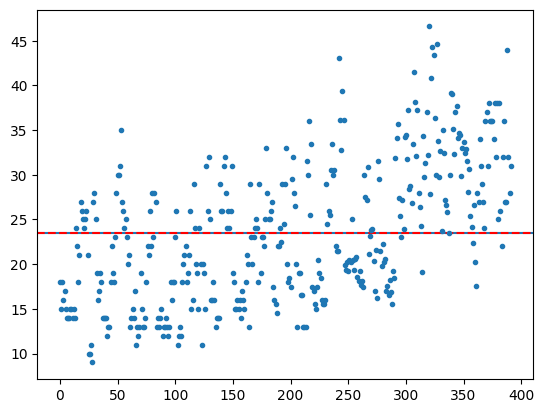

In [17]:
plt.axhline(np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1, 1)) * v1s.transpose().dot(y))
plt.axhline(y.mean(), color='red', linestyle='--')
plt.plot(y, '.')

Centering vector y and compare with y.mean()

In [18]:
i = np.identity(n)
i

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
c = (i - v1s * np.linalg.inv(v1s.T.dot(v1s).reshape(-1, 1)) * v1s.T)
c

array([[ 0.99744898, -0.00255102, -0.00255102, ..., -0.00255102,
        -0.00255102, -0.00255102],
       [-0.00255102,  0.99744898, -0.00255102, ..., -0.00255102,
        -0.00255102, -0.00255102],
       [-0.00255102, -0.00255102,  0.99744898, ..., -0.00255102,
        -0.00255102, -0.00255102],
       ...,
       [-0.00255102, -0.00255102, -0.00255102, ...,  0.99744898,
        -0.00255102, -0.00255102],
       [-0.00255102, -0.00255102, -0.00255102, ..., -0.00255102,
         0.99744898, -0.00255102],
       [-0.00255102, -0.00255102, -0.00255102, ..., -0.00255102,
        -0.00255102,  0.99744898]])

In [20]:
centering1 = c.dot(y)
centering1

array([[ -5.44591837],
       [ -8.44591837],
       [ -5.44591837],
       [ -7.44591837],
       [ -6.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -8.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [  0.55408163],
       [ -1.44591837],
       [ -5.44591837],
       [ -2.44591837],
       [  3.55408163],
       [  2.55408163],
       [  1.55408163],
       [  0.55408163],
       [  1.55408163],
       [  2.55408163],
       [ -2.44591837],
       [-13.44591837],
       [-13.44591837],
       [-12.44591837],
       [-14.44591837],
       [  3.55408163],
       [  4.55408163],
       [  1.55408163],
       [ -4.44591837],
       [ -7.44591837],
       [ -6.44591837],
       [ -4.44591837],
       [ -5.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [-11.44591837],
       [-10.44591837],
       [-10

In [21]:
centering2 = y - y.mean()
centering2

array([[ -5.44591837],
       [ -8.44591837],
       [ -5.44591837],
       [ -7.44591837],
       [ -6.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -8.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [  0.55408163],
       [ -1.44591837],
       [ -5.44591837],
       [ -2.44591837],
       [  3.55408163],
       [  2.55408163],
       [  1.55408163],
       [  0.55408163],
       [  1.55408163],
       [  2.55408163],
       [ -2.44591837],
       [-13.44591837],
       [-13.44591837],
       [-12.44591837],
       [-14.44591837],
       [  3.55408163],
       [  4.55408163],
       [  1.55408163],
       [ -4.44591837],
       [ -7.44591837],
       [ -6.44591837],
       [ -4.44591837],
       [ -5.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [-11.44591837],
       [-10.44591837],
       [-10

In [22]:
sns.set_theme(style='white')

In [23]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot: >

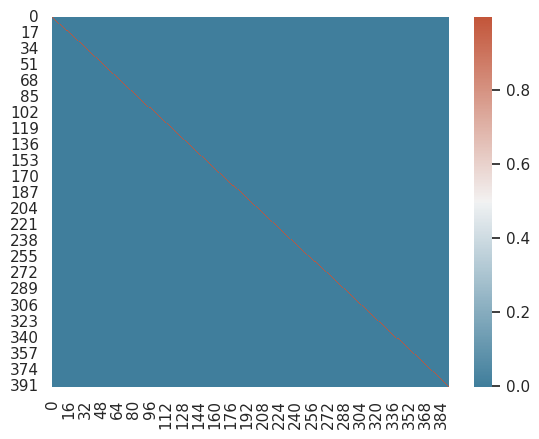

In [24]:
sns.heatmap(c, cmap=cmap)

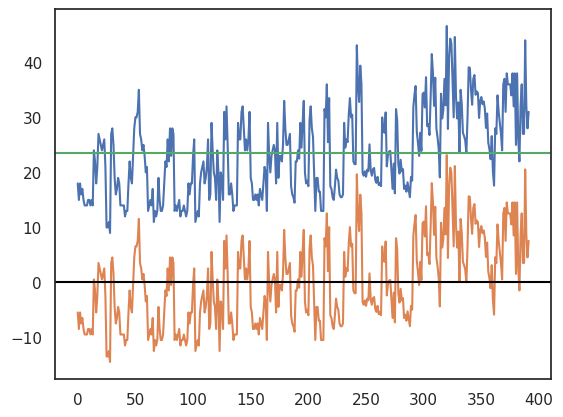

In [25]:
plt.plot(y)
plt.axhline(y.mean(), color='g')
plt.plot(centering1)
plt.axhline(centering1.mean(), color='black')

In [26]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1, 1)).dot(v1s.transpose().dot(centering1))

array([-4.95295415e-15])

In [27]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1, 1)).dot(v1s.transpose().dot(centering2))

array([1.81260902e-15])

In [28]:
(y - y.mean()).mean()

2.0301221021717147e-15

In [29]:
c.T - c

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
c.dot(c) -c

array([[ 5.55111512e-15,  3.68628739e-17,  3.68628739e-17, ...,
        -1.86482774e-17, -1.86482774e-17, -1.86482774e-17],
       [ 3.68628739e-17,  5.44009282e-15,  3.68628739e-17, ...,
        -1.82145965e-17, -1.82145965e-17, -1.82145965e-17],
       [ 3.68628739e-17,  3.68628739e-17,  5.44009282e-15, ...,
        -1.82145965e-17, -1.82145965e-17, -1.82145965e-17],
       ...,
       [-1.86482774e-17, -1.82145965e-17, -1.82145965e-17, ...,
         1.11022302e-16,  4.33680869e-19,  4.33680869e-19],
       [-1.86482774e-17, -1.82145965e-17, -1.82145965e-17, ...,
         4.33680869e-19,  1.11022302e-16,  4.33680869e-19],
       [-1.86482774e-17, -1.82145965e-17, -1.82145965e-17, ...,
         4.33680869e-19,  4.33680869e-19,  1.11022302e-16]])

In [31]:
np.linalg.matrix_power(c, 2)-c

array([[ 5.55111512e-15,  3.68628739e-17,  3.68628739e-17, ...,
        -1.86482774e-17, -1.86482774e-17, -1.86482774e-17],
       [ 3.68628739e-17,  5.44009282e-15,  3.68628739e-17, ...,
        -1.82145965e-17, -1.82145965e-17, -1.82145965e-17],
       [ 3.68628739e-17,  3.68628739e-17,  5.44009282e-15, ...,
        -1.82145965e-17, -1.82145965e-17, -1.82145965e-17],
       ...,
       [-1.86482774e-17, -1.82145965e-17, -1.82145965e-17, ...,
         1.11022302e-16,  4.33680869e-19,  4.33680869e-19],
       [-1.86482774e-17, -1.82145965e-17, -1.82145965e-17, ...,
         4.33680869e-19,  1.11022302e-16,  4.33680869e-19],
       [-1.86482774e-17, -1.82145965e-17, -1.82145965e-17, ...,
         4.33680869e-19,  4.33680869e-19,  1.11022302e-16]])

Obtain the variance and compare with y.var()

In [32]:
y.T.dot(c).dot(y) / (n-1)

array([[60.91814187]])

In [33]:
y.var()

60.76273844231571

In [34]:
np.sqrt(y.T.dot(c).dot(y) / (n-1))

array([[7.80500749]])

In [35]:
y.std()

7.795045762682584

In [36]:
np.sqrt(y.var())

7.795045762682584

Hacer todo pero ahora con X en vez de Y
centrar X por izquierda y derecha

In [37]:
x = df.iloc[:, 1:-2].values

In [38]:
x.mean()

562.2430697278911

In [75]:
x.mean(axis=0)

array([   5.47193878,  194.4119898 ,  104.46938776, 2977.58418367,
         15.54132653,   75.97959184])

$(1_{p}^T 1_{p})^{-1} 1_{p}^T x$

In [66]:
np.linalg.inv(v1s.T.dot(v1s).reshape(-1, 1)) * v1s.T.dot(x)

array([[   5.47193878,  194.4119898 ,  104.46938776, 2977.58418367,
          15.54132653,   75.97959184]])

In [76]:
x.mean(axis=1)

array([671.83333333, 716.25      , 665.5       , 662.83333333,
       663.25      , 842.66666667, 852.5       , 842.25      ,
       865.5       , 752.75      , 700.66666667, 699.16666667,
       733.08333333, 642.33333333, 444.83333333, 536.25      ,
       526.91666667, 494.        , 400.58333333, 345.41666667,
       493.41666667, 452.58333333, 444.25      , 425.75      ,
       504.66666667, 880.33333333, 829.33333333, 833.58333333,
       887.58333333, 400.75      , 430.75      , 420.83333333,
       509.33333333, 643.58333333, 628.58333333, 622.08333333,
       618.75      , 802.5       , 854.91666667, 791.75      ,
       776.        , 934.75      , 901.16666667, 967.66666667,
       570.08333333, 452.33333333, 620.66666667, 594.75      ,
       419.5       , 403.        , 386.25      , 386.41666667,
       333.83333333, 307.83333333, 347.5       , 368.58333333,
       429.58333333, 399.41666667, 417.41666667, 455.58333333,
       421.08333333, 813.5       , 842.        , 782.75

$x (1_{p}^T 1_{p})^{-1} 1_{p}^T$

In [80]:
x.dot(np.linalg.inv(v1s.T.dot(v1s).reshape(-1, 1)) * v1s.T)

ValueError: shapes (392,6) and (1,392) not aligned: 6 (dim 1) != 1 (dim 0)

Centering X

In [97]:
centering_x = c.dot(x)
centering_x

array([[   2.52806122,  112.5880102 ,   25.53061224,  526.41581633,
          -3.54132653,   -5.97959184],
       [   2.52806122,  155.5880102 ,   60.53061224,  715.41581633,
          -4.04132653,   -5.97959184],
       [   2.52806122,  123.5880102 ,   45.53061224,  458.41581633,
          -4.54132653,   -5.97959184],
       ...,
       [  -1.47193878,  -59.4119898 ,  -20.46938776, -682.58418367,
          -3.94132653,    6.02040816],
       [  -1.47193878,  -74.4119898 ,  -25.46938776, -352.58418367,
           3.05867347,    6.02040816],
       [  -1.47193878,  -75.4119898 ,  -22.46938776, -257.58418367,
           3.85867347,    6.02040816]])

In [87]:
c.dot(x).shape

(392, 6)

In [90]:
x.dot(c)

ValueError: shapes (392,6) and (392,392) not aligned: 6 (dim 1) != 392 (dim 0)

In [40]:
x.var()

1292687.77354891

In [93]:
x.T.dot(c).dot(x) / (n-1)

array([[ 8.75147174e+01,  5.10471399e+03,  1.66470487e+03,
         3.91127635e+04, -7.14342622e+01, -6.53249608e+01],
       [ 5.10471399e+03,  3.29353363e+05,  1.08699015e+05,
         2.49425217e+06, -4.72190956e+03, -4.28813108e+03],
       [ 1.66470487e+03,  1.08699015e+05,  4.45610487e+04,
         8.50142885e+05, -2.20123878e+03, -1.77563422e+03],
       [ 3.91127635e+04,  2.49425217e+06,  8.50142885e+05,
         2.17000401e+07, -2.93795972e+04, -2.90912559e+04],
       [-7.14342622e+01, -4.72190956e+03, -2.20123878e+03,
        -2.93795972e+04,  2.28925424e+02,  8.87408163e+01],
       [-6.53249608e+01, -4.28813108e+03, -1.77563422e+03,
        -2.90912559e+04,  8.87408163e+01,  4.08141287e+02]])

In [41]:
x.std()

1136.9642798034201

In [96]:
np.sqrt(x.T.dot(c).dot(x) / (n-1))

/tmp/ipykernel_11451/637372406.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(x.T.dot(c).dot(x) / (n-1))


array([[   9.35493011,   71.4472812 ,   40.80079493,  197.7694707 ,
                  nan,           nan],
       [  71.4472812 ,  573.89316304,  329.69533651, 1579.32015935,
                  nan,           nan],
       [  40.80079493,  329.69533651,  211.09488072,  922.03193296,
                  nan,           nan],
       [ 197.7694707 , 1579.32015935,  922.03193296, 4658.33018302,
                  nan,           nan],
       [          nan,           nan,           nan,           nan,
          15.13028168,    9.42023441],
       [          nan,           nan,           nan,           nan,
           9.42023441,   20.20250696]])

Visualization of the centering operation on the distribution

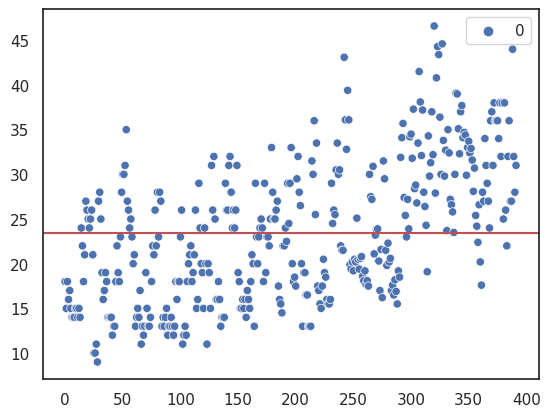

In [42]:
sns.scatterplot(y)
plt.axhline(y.mean(), c='r')

<AxesSubplot: ylabel='Count'>

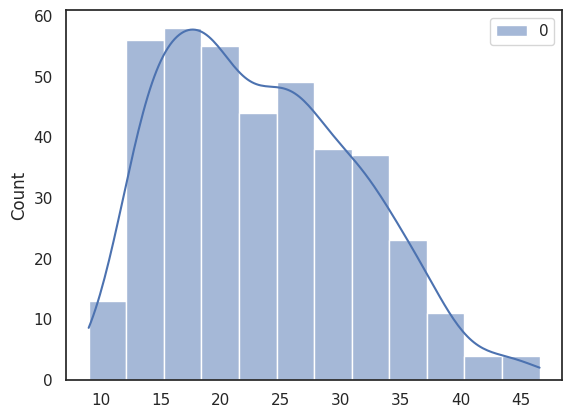

In [43]:
sns.histplot(y, kde=True)

<AxesSubplot: ylabel='Count'>

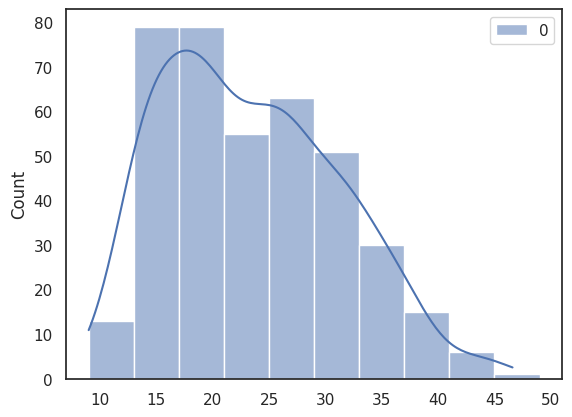

In [44]:
sns.histplot(y, kde=True, binwidth=4)

<AxesSubplot: ylabel='Count'>

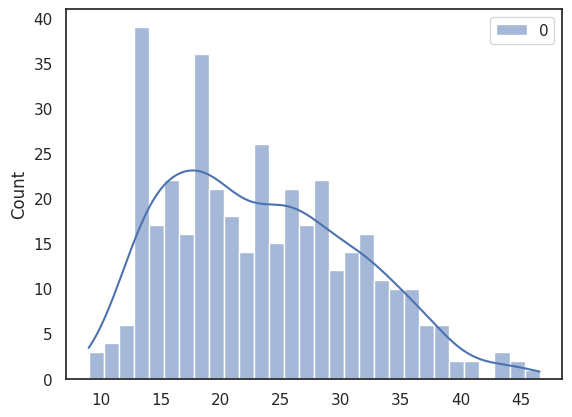

In [45]:
sns.histplot(y, kde=True, bins=30)

<AxesSubplot: ylabel='Count'>

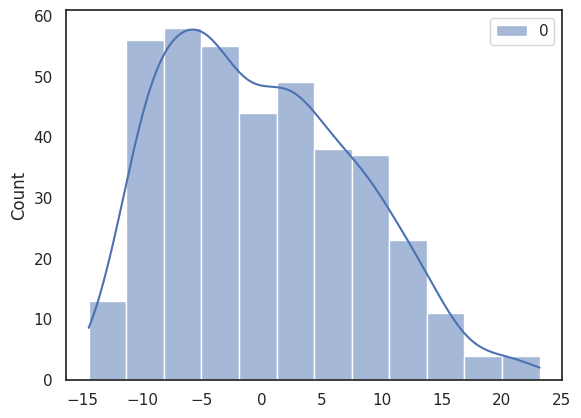

In [46]:
sns.histplot(y-y.mean(), kde=True)

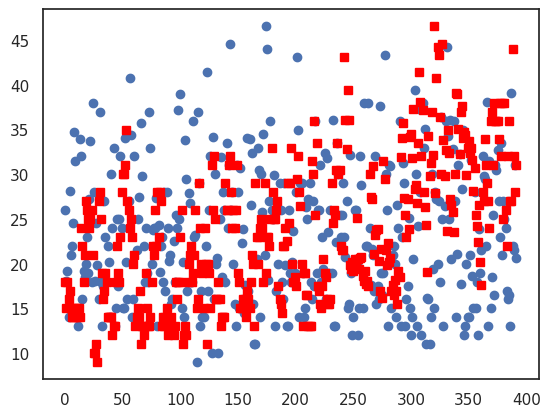

In [47]:
plt.plot(np.random.permutation(y), 'o')
plt.plot(y, 's', c='red')

<AxesSubplot: ylabel='Count'>

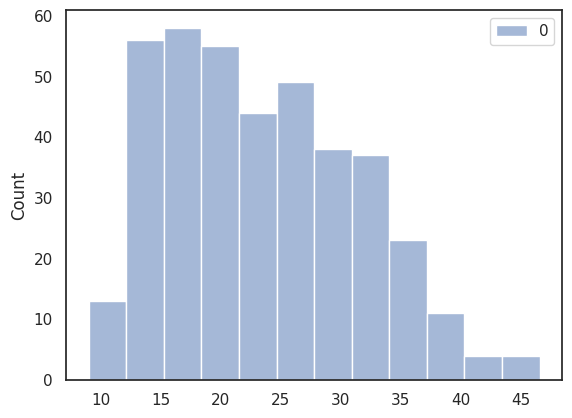

In [48]:
sns.histplot(np.random.permutation(y))

<AxesSubplot: ylabel='Count'>

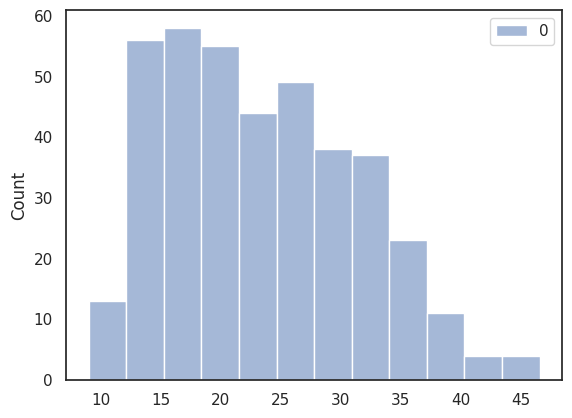

In [49]:
sns.histplot(y)

Hacer distribucion renglon por renglon de los valos centrados en X

<AxesSubplot: ylabel='Count'>

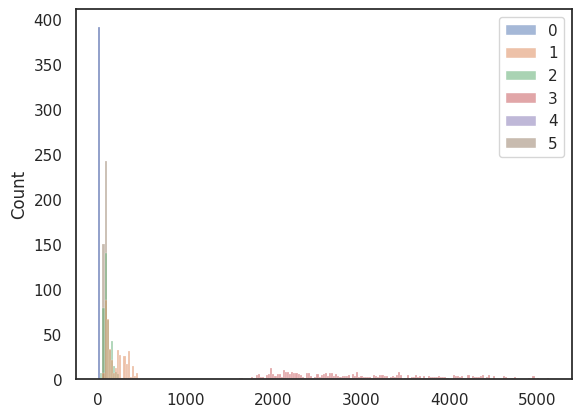

In [50]:
sns.histplot(x)

<AxesSubplot: ylabel='Count'>

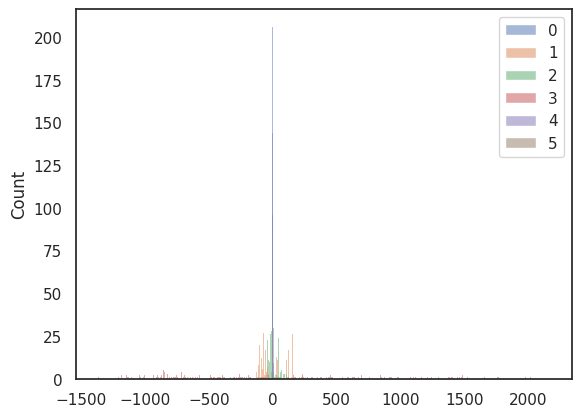

In [104]:
sns.histplot(centering_x)

<AxesSubplot: ylabel='Count'>

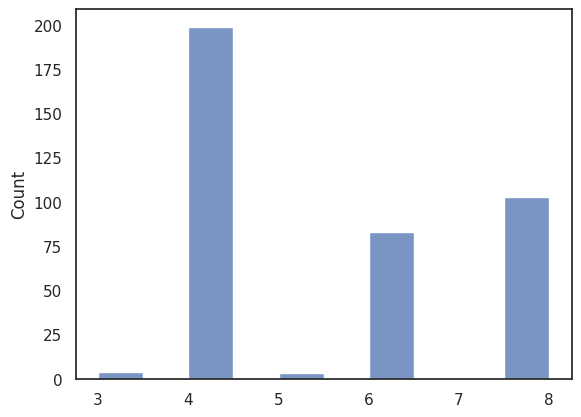

In [124]:
sns.histplot(x[:,0])


<AxesSubplot: ylabel='Count'>

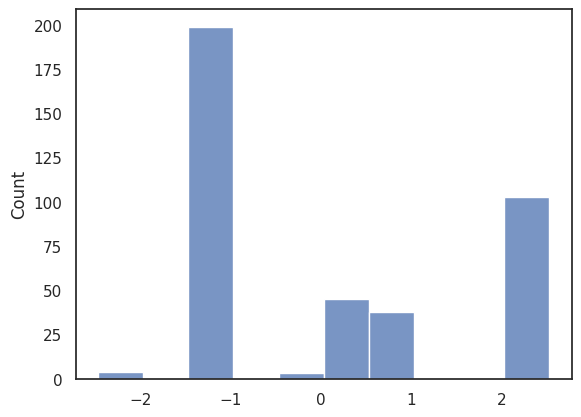

In [125]:
sns.histplot(centering_x[:,0])

<AxesSubplot: ylabel='Count'>

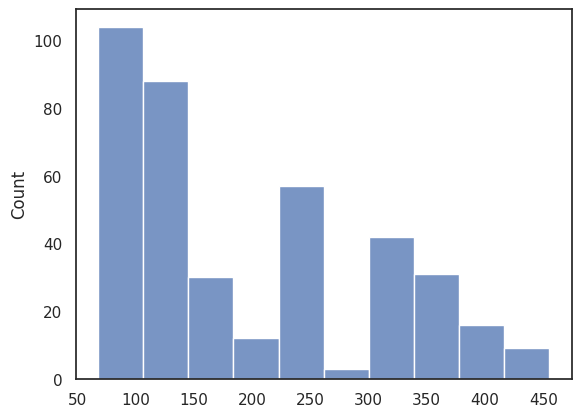

In [126]:
sns.histplot(x[:,1])


<AxesSubplot: ylabel='Count'>

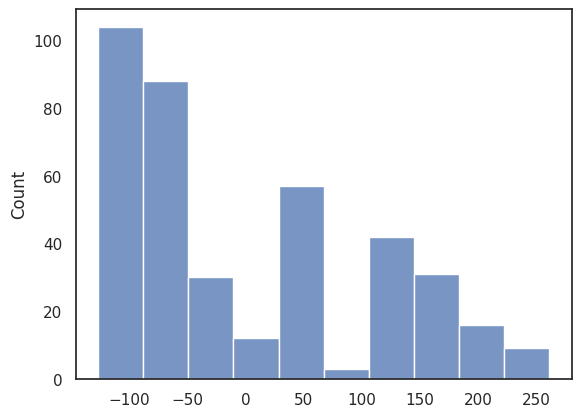

In [127]:
sns.histplot(centering_x[:,1])

<AxesSubplot: ylabel='Count'>

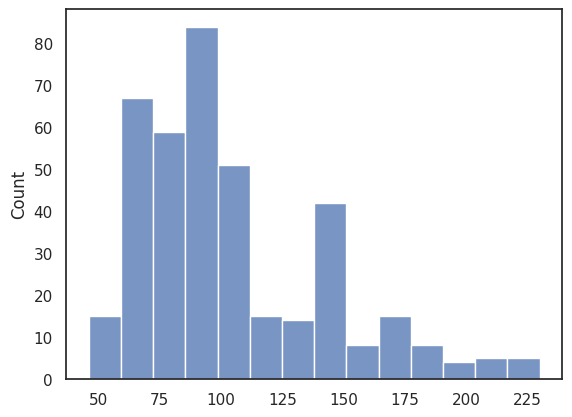

In [128]:
sns.histplot(x[:,2])


<AxesSubplot: ylabel='Count'>

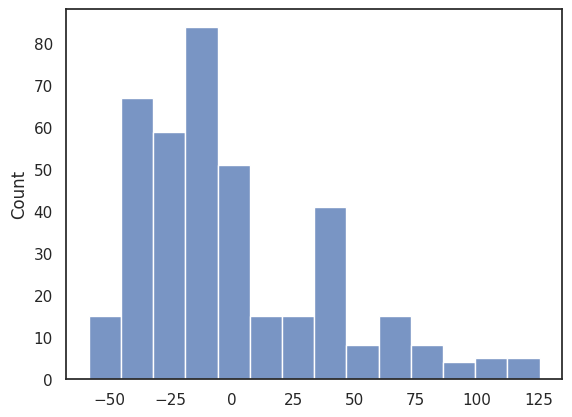

In [129]:
sns.histplot(centering_x[:,2])

<AxesSubplot: ylabel='Count'>

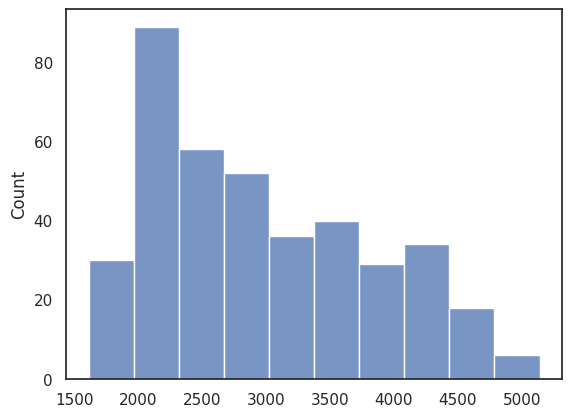

In [130]:
sns.histplot(x[:,3])


<AxesSubplot: ylabel='Count'>

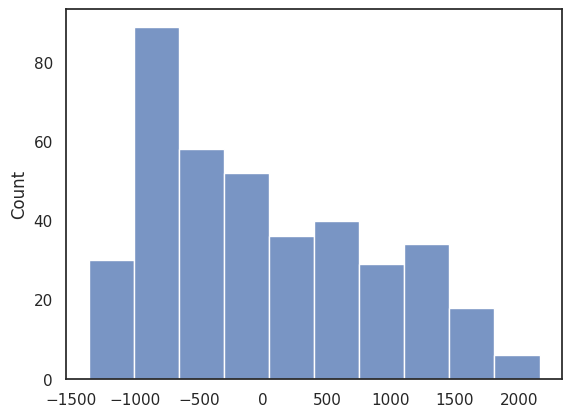

In [131]:
sns.histplot(centering_x[:,3])

<AxesSubplot: ylabel='Count'>

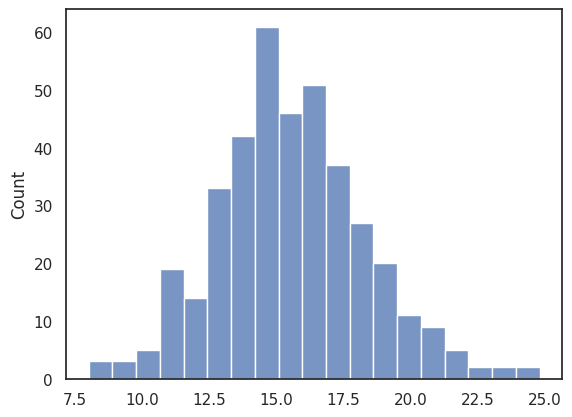

In [132]:
sns.histplot(x[:,4])


<AxesSubplot: ylabel='Count'>

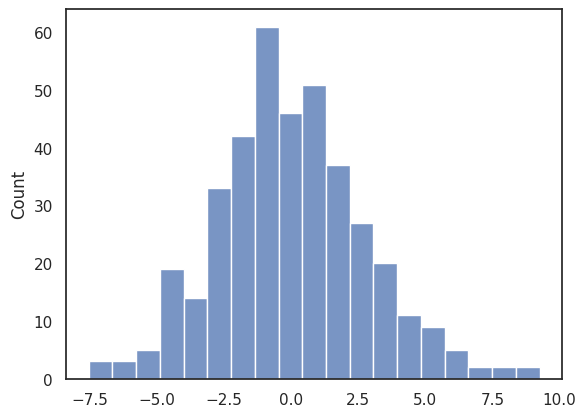

In [133]:
sns.histplot(centering_x[:,4])

<AxesSubplot: ylabel='Count'>

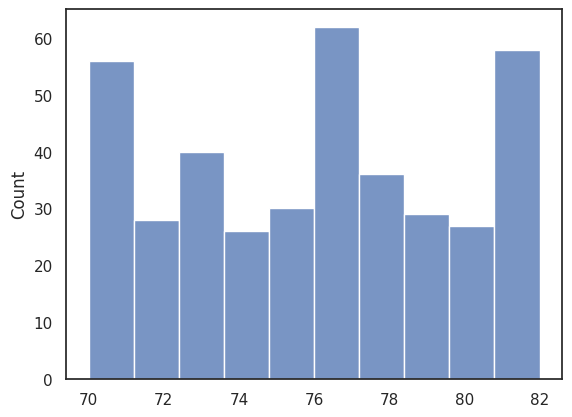

In [134]:
sns.histplot(x[:,5])


<AxesSubplot: ylabel='Count'>

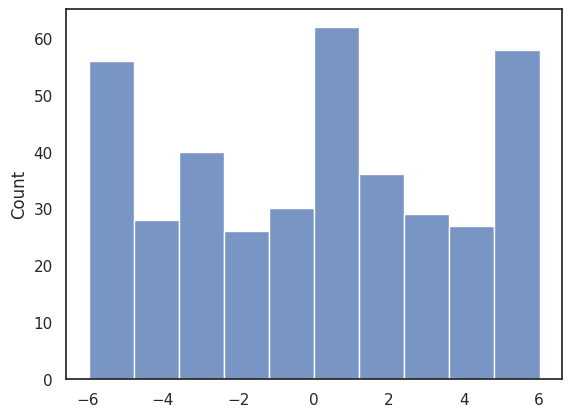

In [135]:
sns.histplot(centering_x[:,5])

<AxesSubplot: ylabel='Count'>

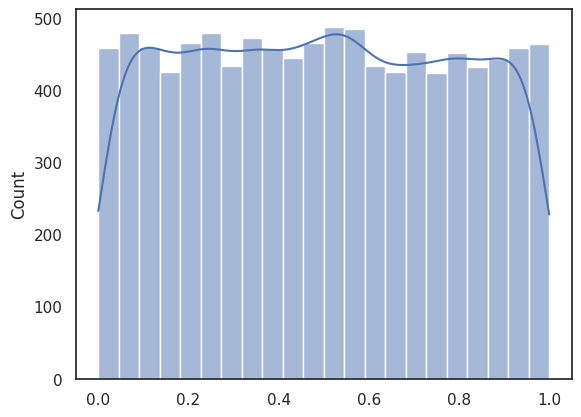

In [51]:
sns.histplot(np.random.rand(10000), kde=True)

In [52]:
n=10^4
sample = np.random.rand(n)
sample.mean()

0.3988077226791598

In [53]:
np.random.rand(10)

array([0.94290705, 0.333918  , 0.58271291, 0.13315501, 0.14898523,
       0.82288937, 0.7931193 , 0.36253567, 0.23881477, 0.60470225])

In [54]:
np.mean(np.random.rand(4, 10), axis=1)

array([0.5865354 , 0.54193966, 0.50593607, 0.56736809])

<AxesSubplot: ylabel='Count'>

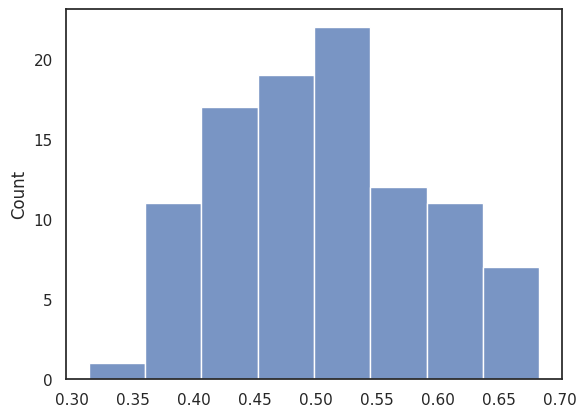

In [55]:
sns.histplot(np.mean(np.random.rand(100, n), axis=1))

<AxesSubplot: ylabel='Count'>

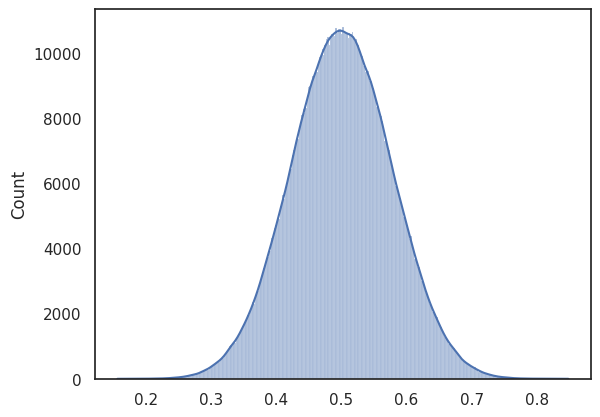

In [56]:
sns.histplot(np.mean(np.random.rand(1000000, n), axis=1), kde=True)

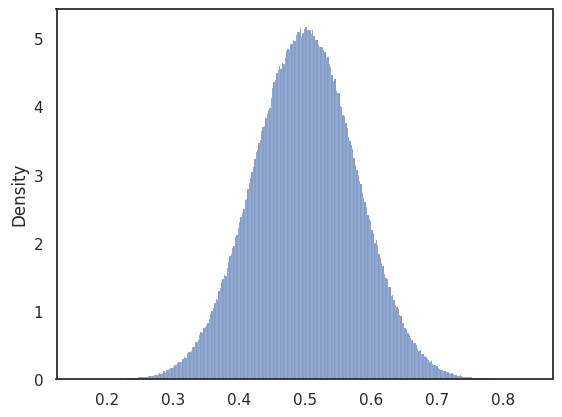

In [57]:
ax = sns.histplot(np.mean(np.random.rand(1000000, n), axis=1), stat='density')

In [58]:
from scipy import stats

In [59]:
seq = np.mean(np.random.rand(100000, n), axis=1)
loc = seq.mean()
scale = seq.std()
print(loc, scale)

0.5001470645574264 0.0771292623648826


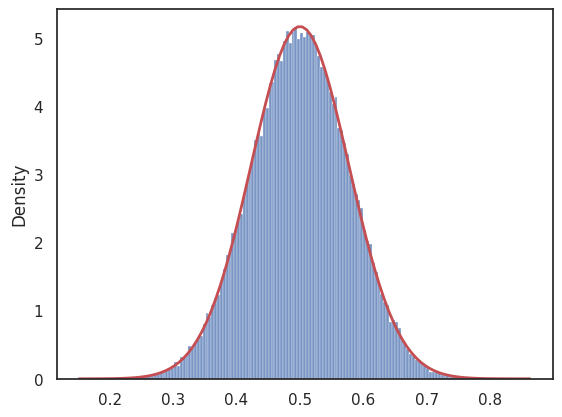

In [60]:
ax = sns.histplot(seq, stat='density')
x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = stats.norm.pdf(x_pdf, loc=loc, scale=scale)
ax.plot(x_pdf, y_pdf, 'r', lw=2)